# Preprocessing
Missing values were addressed, and the dataset was filtered, sorted, and structured.


In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2 as pg2

In [21]:
# Reading previously merged data
df = pd.read_csv('/Users/polzovatel/Desktop/Python/Portfolio/Diabetes_3/1_1_Merging/FullData_merged.csv'
                 ,parse_dates=['Date'])
df

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
0,2022-12-09 00:00:00,breakfast-lunch,1.756,4.7,4.7,3.0,3.5,NaN,NaN,NaN
1,2022-12-09 00:00:00,lunch-dinner,2.511,4.7,4.3,2.5,2.0,NaN,NaN,NaN
2,2022-12-09 00:00:00,dinner-breakfast,3.442,4.3,6.5,2.0,4.0,NaN,NaN,NaN
3,2022-12-10 00:00:00,breakfast-lunch,1.584,6.5,5.6,3.0,4.0,NaN,NaN,NaN
4,2022-12-10 00:00:00,lunch-dinner,2.562,5.6,6.2,2.5,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3910,2023-02-26 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.6,45.25
3911,2023-02-26 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,48.09
3912,2023-02-26 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.0,56.31
3913,2023-02-26 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.8,56.08


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3915 entries, 0 to 3914
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3915 non-null   datetime64[ns]
 1   Interval  238 non-null    object        
 2   DV        238 non-null    float64       
 3   BG1       238 non-null    float64       
 4   BG2       238 non-null    float64       
 5   bID       238 non-null    float64       
 6   shID      238 non-null    float64       
 7   SC        1757 non-null   float64       
 8   Temp      1920 non-null   float64       
 9   Humid     1920 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 306.0+ KB


### Sorting by ['Date']

In [23]:
# Assigning hours to datetime objects according to interval names
df.loc[df['Interval']=='breakfast-lunch', 'Date'] = df.loc[df['Interval']=='breakfast-lunch', 'Date'].dt.floor('H') + pd.Timedelta(hours=7)
df.loc[df['Interval']=='lunch-dinner',    'Date'] = df.loc[df['Interval']=='lunch-dinner',    'Date'].dt.floor('H') + pd.Timedelta(hours=12)
df.loc[df['Interval']=='dinner-breakfast','Date'] = df.loc[df['Interval']=='dinner-breakfast','Date'].dt.floor('H') + pd.Timedelta(hours=18)

In [24]:
df

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
0,2022-12-09 07:00:00,breakfast-lunch,1.756,4.7,4.7,3.0,3.5,NaN,NaN,NaN
1,2022-12-09 12:00:00,lunch-dinner,2.511,4.7,4.3,2.5,2.0,NaN,NaN,NaN
2,2022-12-09 18:00:00,dinner-breakfast,3.442,4.3,6.5,2.0,4.0,NaN,NaN,NaN
3,2022-12-10 07:00:00,breakfast-lunch,1.584,6.5,5.6,3.0,4.0,NaN,NaN,NaN
4,2022-12-10 12:00:00,lunch-dinner,2.562,5.6,6.2,2.5,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3910,2023-02-26 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.6,45.25
3911,2023-02-26 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,48.09
3912,2023-02-26 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.0,56.31
3913,2023-02-26 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.8,56.08


In [25]:
# Sorting dates
df = df.sort_values('Date').reset_index(drop=True)
df

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
0,2022-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.0,65.87
1,2022-12-09 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.1,61.16
2,2022-12-09 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.0,66.11
3,2022-12-09 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.0,65.87
4,2022-12-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.0,72.17
...,...,...,...,...,...,...,...,...,...,...
3910,2023-02-26 19:45:32,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN
3911,2023-02-26 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,48.09
3912,2023-02-26 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.0,56.31
3913,2023-02-26 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.8,56.08


### Dealing with missing values

#### Weather data

In [26]:
# Interpolate weather data
df_int_weather = df.copy()
df_int_weather[['Temp','Humid']] = df_int_weather[['Temp','Humid']].interpolate()

In [27]:
df_int_weather

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
0,2022-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.000000,65.870000
1,2022-12-09 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.100000,61.160000
2,2022-12-09 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.000000,66.110000
3,2022-12-09 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.000000,65.870000
4,2022-12-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.000000,72.170000
...,...,...,...,...,...,...,...,...,...,...
3910,2023-02-26 19:45:32,NaN,NaN,NaN,NaN,NaN,NaN,9.0,-8.866667,47.143333
3911,2023-02-26 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.000000,48.090000
3912,2023-02-26 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.000000,56.310000
3913,2023-02-26 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.800000,56.080000


#### Step count

In [28]:
# Sum SC for each interval
df_sum_sc = df_int_weather.copy()

In [30]:
# Checking control points where the patient records were performed
df_sum_sc[df_sum_sc['Interval'].notnull()]

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
7,2022-12-09 07:00:00,breakfast-lunch,1.756,4.7,4.7,3.0,3.5,NaN,-16.000000,74.385000
19,2022-12-09 12:00:00,lunch-dinner,2.511,4.7,4.3,2.5,2.0,NaN,-11.833333,65.593333
207,2022-12-09 18:00:00,dinner-breakfast,3.442,4.3,6.5,2.0,4.0,NaN,-12.250000,69.320000
223,2022-12-10 07:00:00,breakfast-lunch,1.584,6.5,5.6,3.0,4.0,NaN,-13.950000,77.790000
236,2022-12-10 12:00:00,lunch-dinner,2.562,5.6,6.2,2.5,2.0,NaN,-12.000000,66.352500
...,...,...,...,...,...,...,...,...,...,...
3827,2023-02-24 18:00:00,dinner-breakfast,2.389,6.2,5.1,3.0,2.5,NaN,-9.500000,66.945000
3840,2023-02-25 07:00:00,breakfast-lunch,1.706,5.1,6.7,3.0,3.0,NaN,-15.500000,65.815000
3852,2023-02-25 12:00:00,lunch-dinner,1.952,6.7,3.8,3.0,3.0,NaN,-11.333333,56.216667
3864,2023-02-25 18:00:00,dinner-breakfast,2.677,3.8,4.3,3.0,2.5,NaN,-7.500000,59.725000


In [31]:
# Exploring the first rows between intervals
df_sum_sc.loc[7:19]

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
7,2022-12-09 07:00:00,breakfast-lunch,1.756,4.7,4.7,3.0,3.5,NaN,-16.000000,74.385000
8,2022-12-09 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.000000,77.270000
9,2022-12-09 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.000000,77.310000
10,2022-12-09 08:07:29,NaN,NaN,NaN,NaN,NaN,NaN,40.0,-18.500000,77.225000
11,2022-12-09 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19.000000,77.140000
12,2022-12-09 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.800000,76.350000
13,2022-12-09 10:33:30,NaN,NaN,NaN,NaN,NaN,NaN,970.0,-15.866667,74.806667
14,2022-12-09 10:43:02,NaN,NaN,NaN,NaN,NaN,NaN,527.0,-14.933333,73.263333
15,2022-12-09 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.000000,71.720000
16,2022-12-09 11:12:18,NaN,NaN,NaN,NaN,NaN,NaN,216.0,-13.333333,69.930000


In [32]:
# Creating a list of control points indices 
interval_index = df_sum_sc.index[df_sum_sc['Interval'].notnull()]
interval_index

Int64Index([   7,   19,  207,  223,  236,  252,  267,  276,  286,  300,
            ...
            3751, 3761, 3781, 3798, 3814, 3827, 3840, 3852, 3864, 3882],
           dtype='int64', length=238)

In [33]:
# Adding step count for each control point by summing the step count values between them
for i in range(len(interval_index)-1):
    
    start = interval_index[i]
    stop = interval_index[i+1]
    
    df_sum_sc.loc[start,'SC'] = df_sum_sc.loc[start:stop,'SC'].sum()

In [34]:
# Checking if there are any control points where step count is missing
df_sum_sc[(df_sum_sc['Interval'].notnull())&(df_sum_sc['SC'].isna())]

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
3882,2023-02-26 07:00:00,breakfast-lunch,1.753,4.3,3.9,3.0,3.5,NaN,-18.933333,84.183333


In [35]:
# Removing the row with missing SC
df_sum_sc.drop(3882,inplace=True)

### Removing unnecessary rows

In [36]:
df_intervals = df_sum_sc[df_sum_sc['Interval'].notnull()].reset_index(drop=True)

In [37]:
df_intervals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      237 non-null    datetime64[ns]
 1   Interval  237 non-null    object        
 2   DV        237 non-null    float64       
 3   BG1       237 non-null    float64       
 4   BG2       237 non-null    float64       
 5   bID       237 non-null    float64       
 6   shID      237 non-null    float64       
 7   SC        237 non-null    float64       
 8   Temp      237 non-null    float64       
 9   Humid     237 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 18.6+ KB


In [38]:
# Renaming intervals for visualisation purposes (less space when plotting)
df_intervals.loc[df_intervals['Interval']=='breakfast-lunch','Interval'] = 'B-L'
df_intervals.loc[df_intervals['Interval']=='lunch-dinner','Interval'] = 'L-D'
df_intervals.loc[df_intervals['Interval']=='dinner-breakfast','Interval'] = 'D-B'

In [39]:
df_intervals

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
0,2022-12-09 07:00:00,B-L,1.756,4.7,4.7,3.0,3.5,1820.0,-16.000000,74.385000
1,2022-12-09 12:00:00,L-D,2.511,4.7,4.3,2.5,2.0,61342.0,-11.833333,65.593333
2,2022-12-09 18:00:00,D-B,3.442,4.3,6.5,2.0,4.0,18.0,-12.250000,69.320000
3,2022-12-10 07:00:00,B-L,1.584,6.5,5.6,3.0,4.0,2607.0,-13.950000,77.790000
4,2022-12-10 12:00:00,L-D,2.562,5.6,6.2,2.5,2.0,2067.0,-12.000000,66.352500
...,...,...,...,...,...,...,...,...,...,...
232,2023-02-24 12:00:00,L-D,2.194,6.5,6.2,3.0,3.0,1715.0,-10.142857,66.795714
233,2023-02-24 18:00:00,D-B,2.389,6.2,5.1,3.0,2.5,0.0,-9.500000,66.945000
234,2023-02-25 07:00:00,B-L,1.706,5.1,6.7,3.0,3.0,1505.0,-15.500000,65.815000
235,2023-02-25 12:00:00,L-D,1.952,6.7,3.8,3.0,3.0,68.0,-11.333333,56.216667


### Searching for outliers

#### Manual exploration

<AxesSubplot: xlabel='DV'>

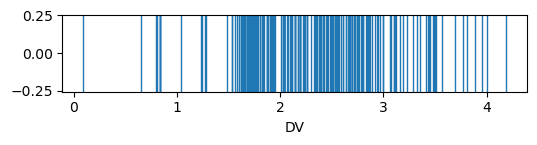

In [41]:
# DV values
plt.figure(figsize=(6,1))
sns.rugplot(data=df_intervals,x='DV',height=1)

<AxesSubplot: xlabel='BG1'>

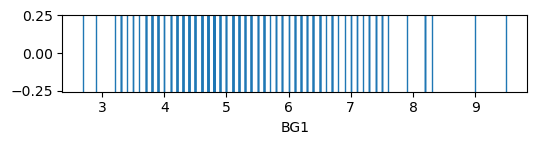

In [42]:
# BG1 values
plt.figure(figsize=(6,1))
sns.rugplot(data=df_intervals,x='BG1',height=1)

<AxesSubplot: xlabel='bID'>

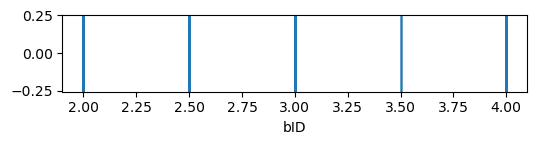

In [43]:
# bID values
plt.figure(figsize=(6,1))
sns.rugplot(data=df_intervals,x='bID',height=1)

<AxesSubplot: xlabel='SC'>

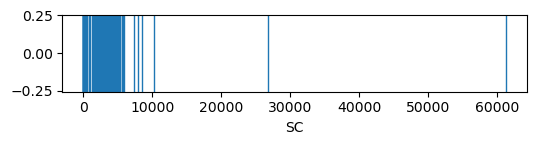

In [44]:
# SC values
plt.figure(figsize=(6,1))
sns.rugplot(data=df_intervals,x='SC',height=1)

In [46]:
# Removing extreme outliers 
df_intervals.drop(df_intervals.index[df_intervals['SC']>10000],inplace=True)
df_intervals.reset_index(drop=True,inplace=True)

<AxesSubplot: xlabel='SC'>

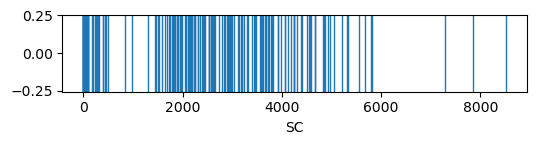

In [47]:
# SC values after removal
plt.figure(figsize=(6,1))
sns.rugplot(data=df_intervals,x='SC',height=1)

<AxesSubplot: xlabel='Temp'>

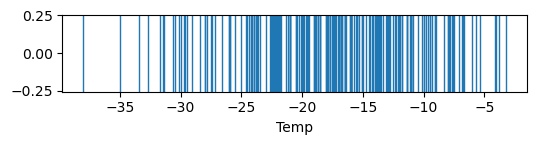

In [48]:
# Temp values
plt.figure(figsize=(6,1))
sns.rugplot(data=df_intervals,x='Temp',height=1)

<AxesSubplot: xlabel='Humid'>

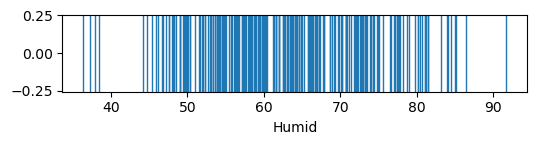

In [49]:
# Humid values
plt.figure(figsize=(6,1))
sns.rugplot(data=df_intervals,x='Humid',height=1)

#### Removing outliers with DBSCAN

In [50]:
# Selecting numeric columns
X = df_intervals[['DV','BG1','bID','SC','Temp','Humid']]

In [51]:
# Scale X
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [52]:
# Define model
model = DBSCAN(eps=0.3)

In [53]:
# Fit the model
model.fit(scaled_X)

DBSCAN(eps=0.3)

In [54]:
# List of outlier's indices
outliers = np.where(model.labels_ == -1)

In [55]:
# Exploring outliers
df_intervals.loc[outliers]

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
16,2022-12-14 18:00:00,D-B,2.751,4.4,4.2,2.0,3.0,7863.0,-16.000000,77.670000
17,2022-12-15 07:00:00,B-L,1.625,4.2,5.0,3.0,3.0,8523.0,-21.190476,63.614762
30,2022-12-19 12:00:00,L-D,2.063,3.4,3.7,2.5,2.0,5314.0,-19.840000,63.494000
45,2022-12-24 12:00:00,L-D,1.923,4.8,5.6,2.5,2.0,2310.0,-3.200000,54.888000
48,2022-12-25 12:00:00,L-D,2.481,5.3,4.7,2.5,4.0,7285.0,-8.000000,71.998333
63,2022-12-30 12:00:00,L-D,1.566,7.5,5.2,2.5,4.0,317.0,-16.800000,63.792000
66,2022-12-31 12:00:00,L-D,2.235,8.3,7.3,2.5,4.0,1881.0,-13.000000,59.230000
68,2023-01-01 07:00:00,B-L,0.093,9.5,6.9,3.0,5.5,19.0,-19.600000,66.890000
71,2023-01-02 07:00:00,B-L,0.647,9.0,7.6,4.0,4.5,52.0,-24.000000,56.135000
72,2023-01-02 12:00:00,L-D,3.409,7.6,6.3,3.0,5.0,5338.0,-20.500000,50.325000


In [58]:
# Removing outliers found by DBSCAN
df_preprocessed = df_intervals.drop(outliers[0]).reset_index(drop=True)
df_preprocessed

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
0,2022-12-09 07:00:00,B-L,1.756,4.7,4.7,3.0,3.5,1820.0,-16.000000,74.385000
1,2022-12-09 18:00:00,D-B,3.442,4.3,6.5,2.0,4.0,18.0,-12.250000,69.320000
2,2022-12-10 07:00:00,B-L,1.584,6.5,5.6,3.0,4.0,2607.0,-13.950000,77.790000
3,2022-12-10 12:00:00,L-D,2.562,5.6,6.2,2.5,2.0,2067.0,-12.000000,66.352500
4,2022-12-10 18:00:00,D-B,4.190,6.2,6.1,2.0,3.5,487.0,-12.050000,66.390000
...,...,...,...,...,...,...,...,...,...,...
198,2023-02-24 12:00:00,L-D,2.194,6.5,6.2,3.0,3.0,1715.0,-10.142857,66.795714
199,2023-02-24 18:00:00,D-B,2.389,6.2,5.1,3.0,2.5,0.0,-9.500000,66.945000
200,2023-02-25 07:00:00,B-L,1.706,5.1,6.7,3.0,3.0,1505.0,-15.500000,65.815000
201,2023-02-25 12:00:00,L-D,1.952,6.7,3.8,3.0,3.0,68.0,-11.333333,56.216667


In [67]:
# Converting step count, temperature and humidity into integers
df_preprocessed[['SC','Temp','Humid']] = df_preprocessed[['SC','Temp','Humid']].astype(int)
df_preprocessed

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
0,2022-12-09 07:00:00,B-L,1.756,4.7,4.7,3.0,3.5,1820,-16,74
1,2022-12-09 18:00:00,D-B,3.442,4.3,6.5,2.0,4.0,18,-12,69
2,2022-12-10 07:00:00,B-L,1.584,6.5,5.6,3.0,4.0,2607,-13,77
3,2022-12-10 12:00:00,L-D,2.562,5.6,6.2,2.5,2.0,2067,-12,66
4,2022-12-10 18:00:00,D-B,4.190,6.2,6.1,2.0,3.5,487,-12,66
...,...,...,...,...,...,...,...,...,...,...
198,2023-02-24 12:00:00,L-D,2.194,6.5,6.2,3.0,3.0,1715,-10,66
199,2023-02-24 18:00:00,D-B,2.389,6.2,5.1,3.0,2.5,0,-9,66
200,2023-02-25 07:00:00,B-L,1.706,5.1,6.7,3.0,3.0,1505,-15,65
201,2023-02-25 12:00:00,L-D,1.952,6.7,3.8,3.0,3.0,68,-11,56


In [68]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      203 non-null    datetime64[ns]
 1   Interval  203 non-null    object        
 2   DV        203 non-null    float64       
 3   BG1       203 non-null    float64       
 4   BG2       203 non-null    float64       
 5   bID       203 non-null    float64       
 6   shID      203 non-null    float64       
 7   SC        203 non-null    int64         
 8   Temp      203 non-null    int64         
 9   Humid     203 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 16.0+ KB


In [69]:
# Saving the file 
df_preprocessed.to_csv('FullData_preprocessed.csv',index=False)

### Uploading to SQL server

In [98]:
#secret = 'password'

In [99]:
# Establish the connection
conn = pg2.connect(database='diabetes_app',user='postgres',password=secret,port='5434')

In [100]:
# Create a cursor variable
cursor = conn.cursor()

In [101]:
# Drop table if it already exist
cursor.execute('DROP TABLE IF EXISTS patient1_full_data_preprocessed;')

In [102]:
# Query to create a table
create_query = 'CREATE TABLE patient1_full_data_preprocessed (date DATE, interval VARCHAR NOT NULL, dv NUMERIC(5, 3) NOT NULL, bg1 NUMERIC(3, 1) NOT NULL, bg2 NUMERIC(3, 1) NOT NULL, bid NUMERIC(3, 1) NOT NULL, shid NUMERIC(3, 1) NOT NULL, sc INT NOT NULL, temp INT NOT NULL, humid INT NOT NULL);'

In [103]:
# Execute the query
cursor.execute(create_query)

In [104]:
# Commit changes
conn.commit()

In [105]:
# Query to insert values into the table (start line)
insert_query = 'INSERT INTO patient1_full_data_preprocessed VALUES'

In [106]:
# A list of columns with non numeric values
obj_cols = df_preprocessed.columns[:2]
obj_cols

Index(['Date', 'Interval'], dtype='object')

In [107]:
# A list of columns with numeric values
num_cols = df_preprocessed.columns[2:]
num_cols

Index(['DV', 'BG1', 'BG2', 'bID', 'shID', 'SC', 'Temp', 'Humid'], dtype='object')

In [108]:
# A foorloop to append the values for each row 
for i in df_preprocessed.index:
    row = ''
    for o in obj_cols:
        row = row + "'" + str(df_preprocessed.loc[i,o]) + "'" + ','
    for n in num_cols:
        row = row + str(df_preprocessed.loc[i,n]) + ','
    insert_query = insert_query + '(' + row[:-1] + '),'
insert_query = insert_query[:-1] + ';'

In [109]:
# Check if the format is correct
insert_query

"INSERT INTO patient1_full_data_preprocessed VALUES('2022-12-09 07:00:00','B-L',1.756,4.7,4.7,3.0,3.5,1820,-16,74),('2022-12-09 18:00:00','D-B',3.442,4.3,6.5,2.0,4.0,18,-12,69),('2022-12-10 07:00:00','B-L',1.584,6.5,5.6,3.0,4.0,2607,-13,77),('2022-12-10 12:00:00','L-D',2.562,5.6,6.2,2.5,2.0,2067,-12,66),('2022-12-10 18:00:00','D-B',4.19,6.2,6.1,2.0,3.5,487,-12,66),('2022-12-11 07:00:00','B-L',1.629,6.1,7.0,3.0,3.5,43,-15,66),('2022-12-11 12:00:00','L-D',2.023,7.0,7.1,2.5,3.5,72,-13,59),('2022-12-11 18:00:00','D-B',2.639,7.1,4.2,2.0,3.5,20,-13,63),('2022-12-12 07:00:00','B-L',1.763,4.2,5.1,3.0,3.5,2430,-19,79),('2022-12-12 12:00:00','L-D',2.173,5.1,6.6,2.5,2.0,3580,-13,64),('2022-12-12 18:00:00','D-B',2.74,6.6,5.3,2.0,3.5,12,-11,56),('2022-12-13 07:00:00','B-L',1.834,5.3,4.8,3.0,3.5,2392,-14,81),('2022-12-13 12:00:00','L-D',1.939,4.8,3.8,2.5,2.0,4073,-12,85),('2022-12-13 18:00:00','D-B',2.676,3.8,3.8,2.0,3.0,82,-10,84),('2022-12-14 07:00:00','B-L',1.789,3.8,5.6,3.0,3.0,57,-16,74),('2022

In [110]:
# Execute the whole query
cursor.execute(insert_query)

In [111]:
# Commit changes
conn.commit()

In [112]:
# Close the connection
conn.close()